# 융합 데이터 시각화

## Load iris dataset
- Fisher's iris dataset, the most famous bechmark dataset
- Wikipedia: https://en.wikipedia.org/wiki/Iris_flower_data_set
- UCI data repository: https://archive.ics.uci.edu/ml/datasets/Iris

**Importing pandas and Seaborn module**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')   

In [2]:
# 시스템 폰트 찾기
import matplotlib.font_manager as fm

for f in fm.fontManager.ttflist:
    if f.name.find('Gothic') != -1:
        print(f.name)

Hiragino Maru Gothic Pro
NanumGothic
NanumBarunGothic
NanumBarunGothic
AppleGothic
NanumBarunGothic
Noto Sans Gothic
NanumGothic
Apple SD Gothic Neo
NanumGothic
NanumGothic
NanumBarunGothic


In [3]:
# 한글 폰트 설정
from matplotlib import rcParams

rcParams['font.family'] = 'NanumGothic'
rcParams['font.size'] = 10

**Importing Iris data set**

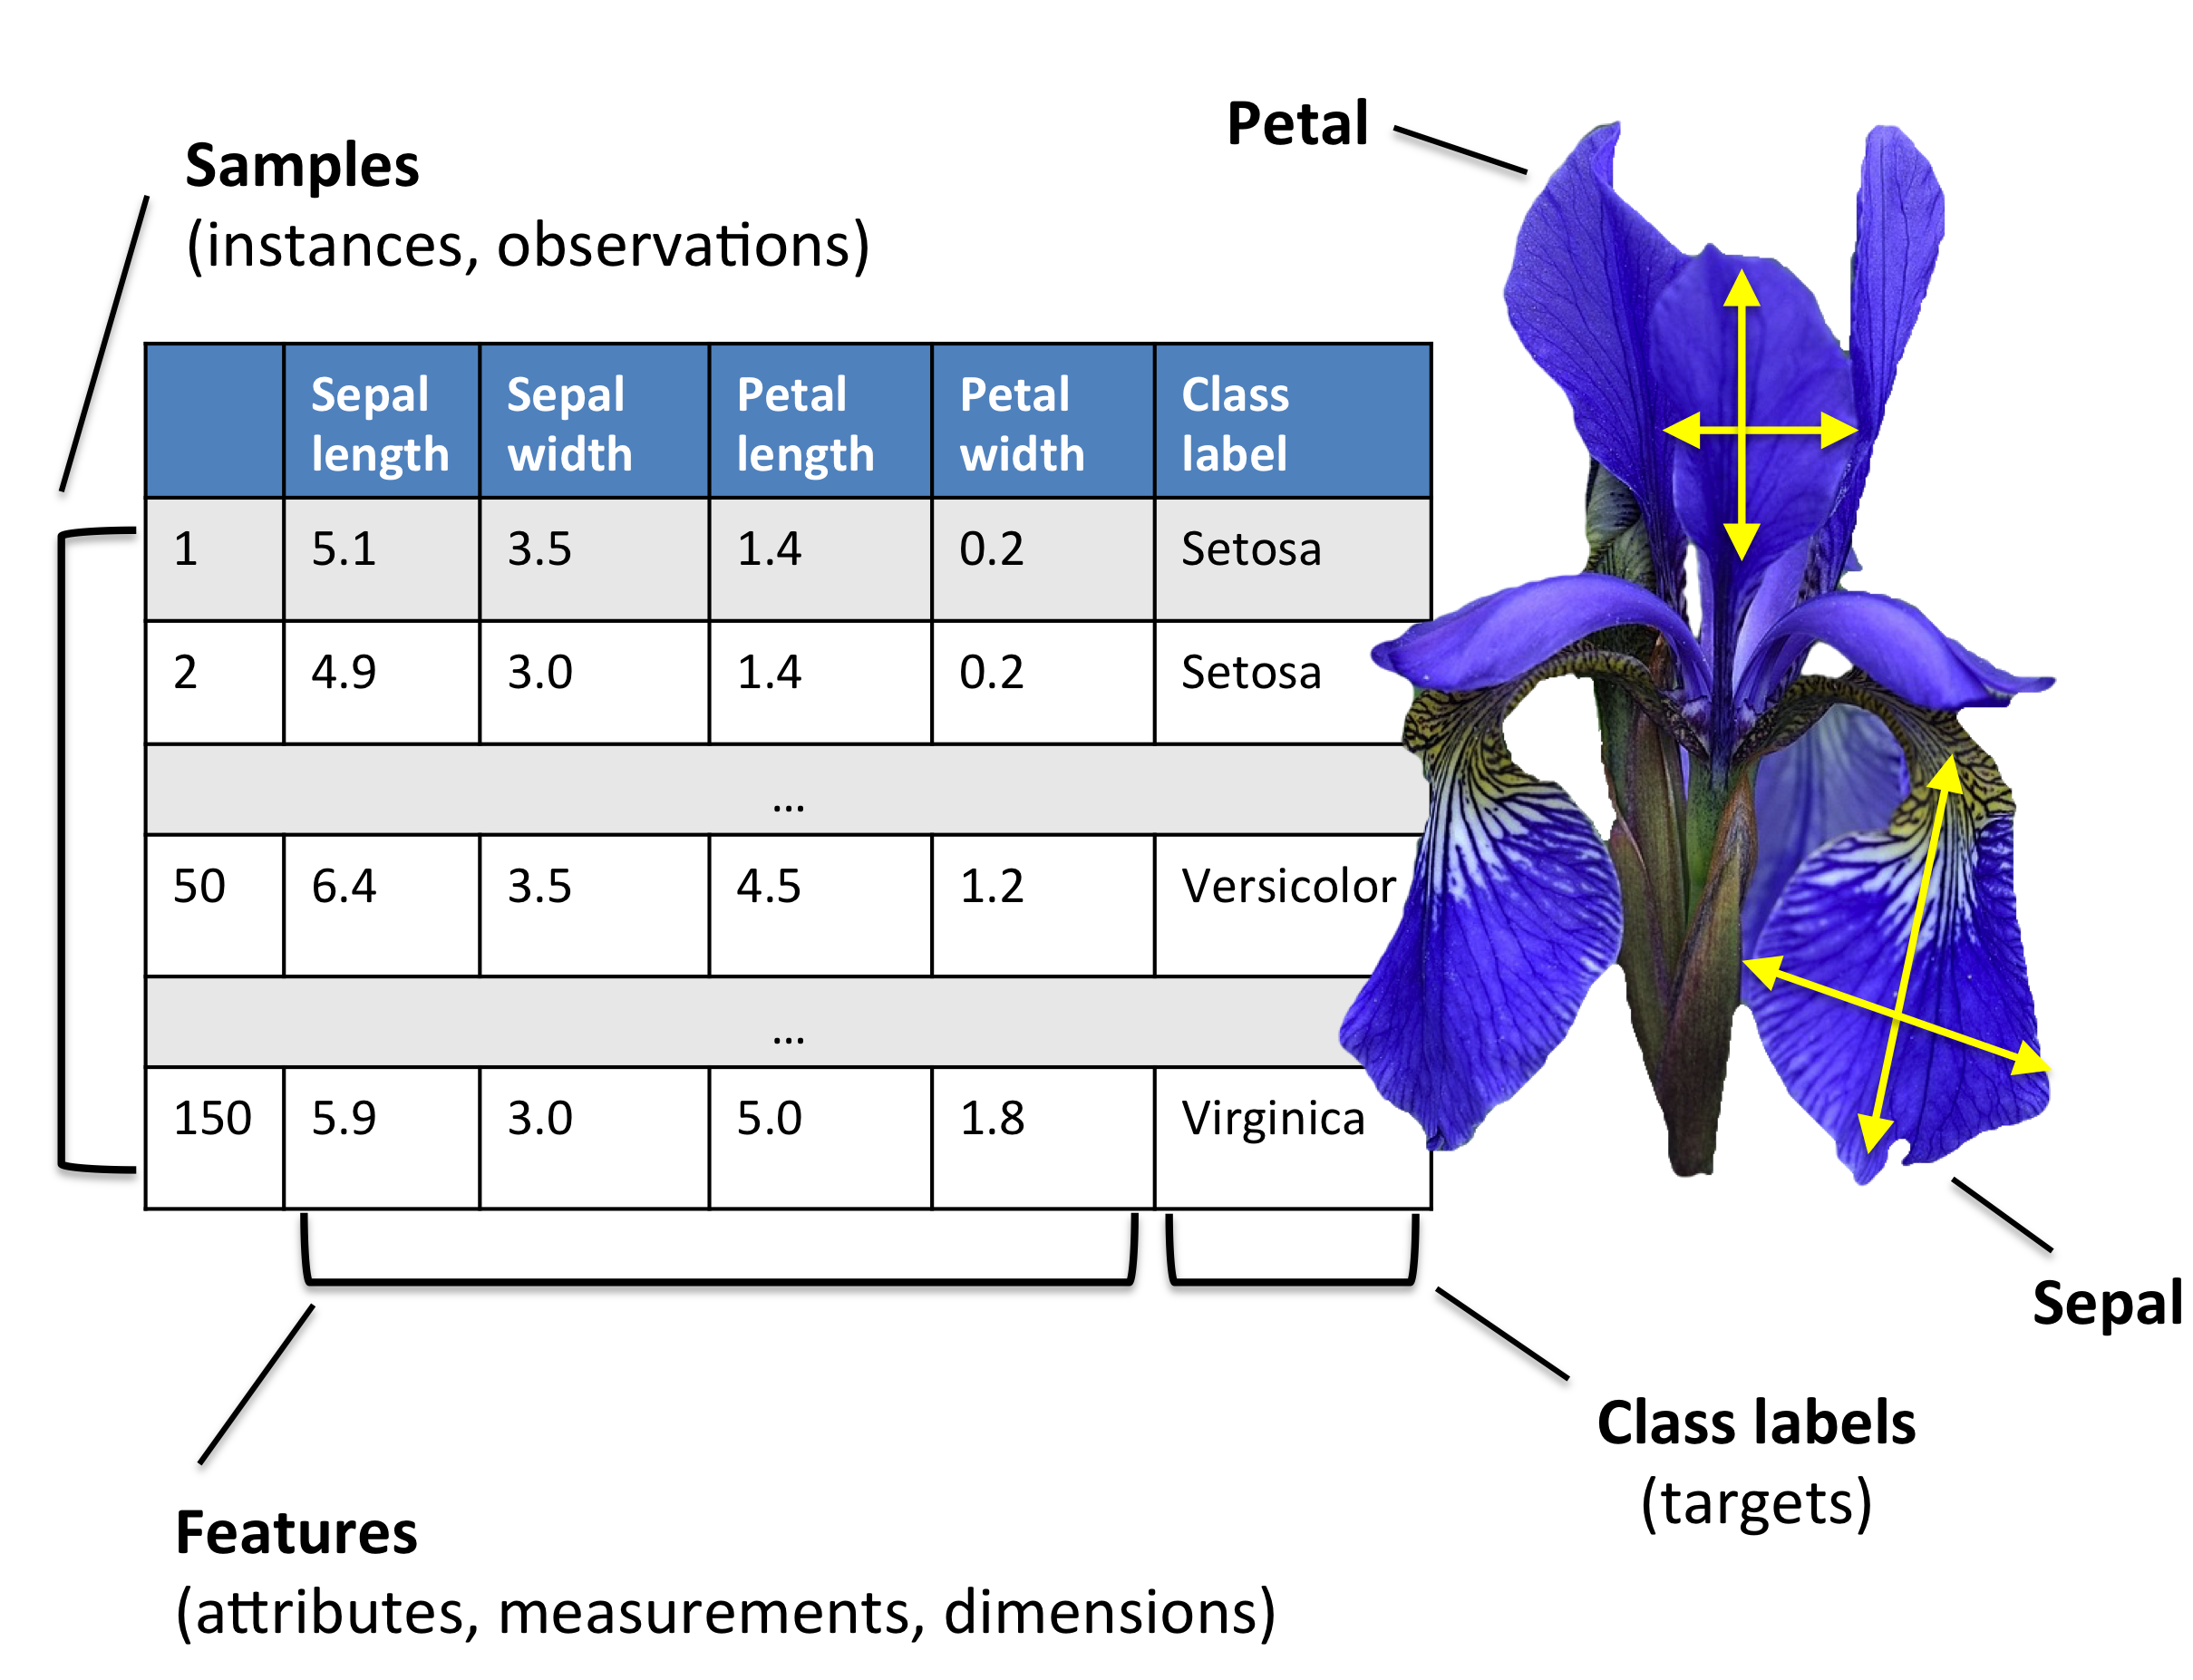

In [4]:
from IPython.display import Image
Image(filename='./data/iris.png', width=700) 

In [2]:
iris = sns.load_dataset("iris") 

**Displaying data **

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
iris['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

This data set has three varities of Iris plant.

**1. Describing the data**

Text(0.5, 1.0, 'General Statistics of Iris Dataset')

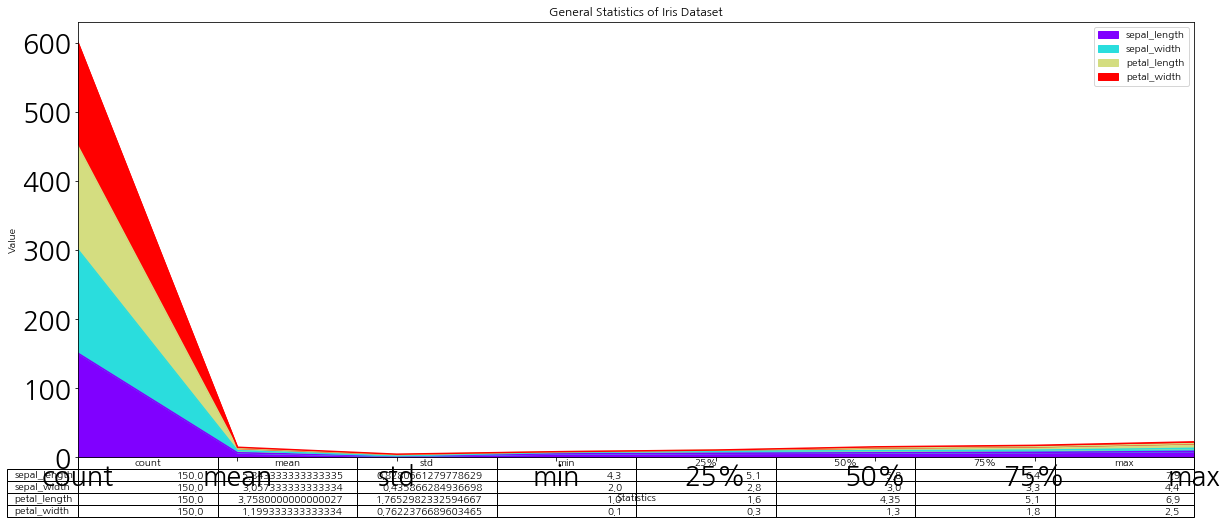

In [9]:
iris.describe().plot(kind = "area",fontsize=27, figsize = (20,8), table = True,colormap="rainbow")

plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Iris Dataset")

Above plot gives us a General Idea about the dataset.

**2.Bar Plot :**
Here the frequency of the observation is plotted.In this case we are plotting the frequency of the three species in the Iris Dataset

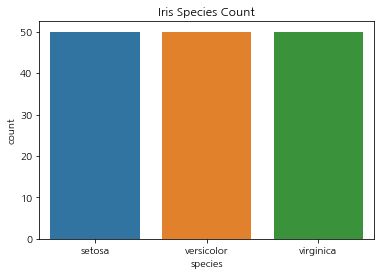

In [10]:
# f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('species',data=iris)
plt.title('Iris Species Count')
plt.show()

**3. Pie Chart :**


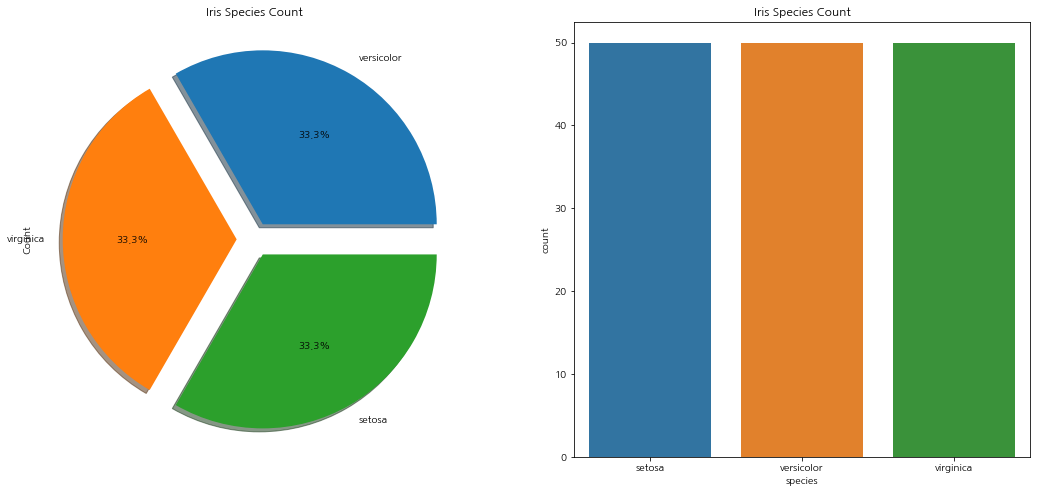

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
# iris['species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
iris['species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Iris Species Count')
ax[0].set_ylabel('Count')
sns.countplot('species',data=iris,ax=ax[1])
ax[1].set_title('Iris Species Count')
plt.show()


We can see that there are 50 samples each of all the Iris Species in the data set.

**4. Joint plot: **
Jointplot is seaborn library specific and can be used to quickly visualize and analyze the relationship between two variables and describe their individual distributions on the same plot.

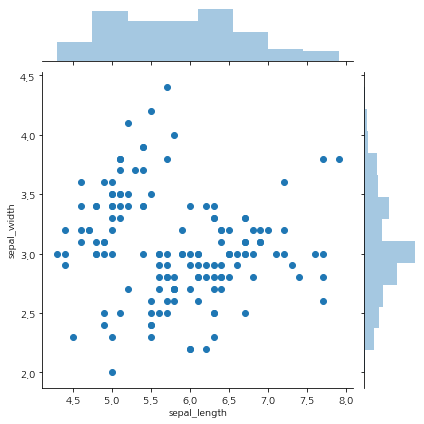

In [12]:
fig=sns.jointplot(x='sepal_length',y='sepal_width',data=iris)

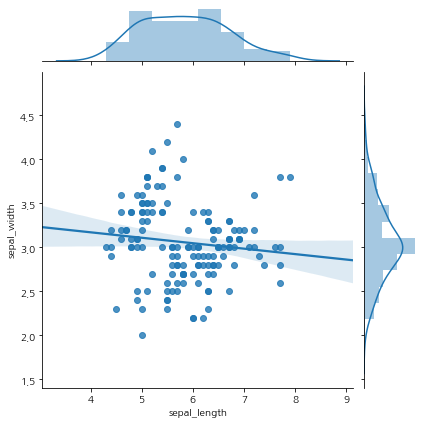

In [13]:
sns.jointplot("sepal_length", "sepal_width", data=iris, kind="reg")

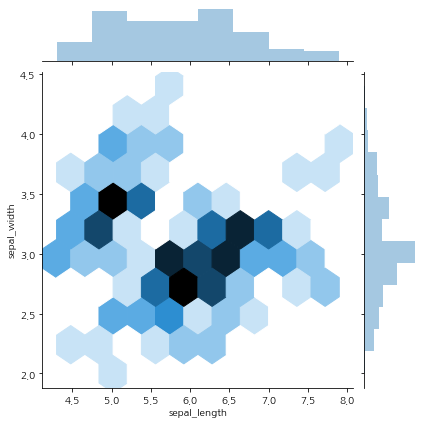

In [14]:
fig=sns.jointplot(x='sepal_length',y='sepal_width',kind='hex',data=iris)

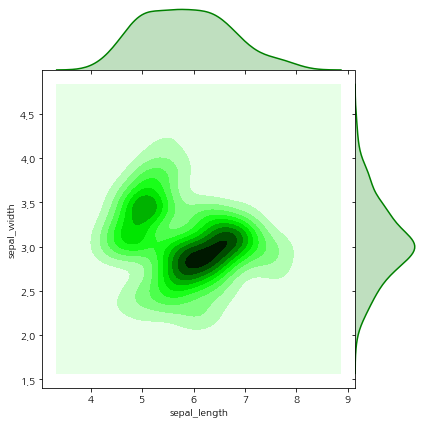

In [15]:
sns.jointplot(x='sepal_length',y='sepal_width', data=iris, kind="kde",space=0,color='g')

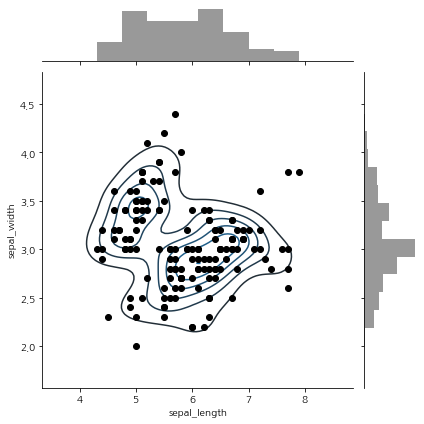

In [16]:
g = (sns.jointplot(x='sepal_length',y='sepal_width',data=iris, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6))

**5. FacetGrid Plot**

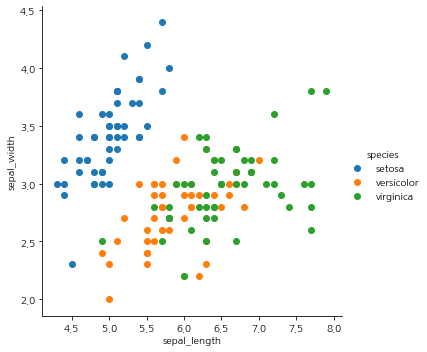

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

sns.FacetGrid(iris,hue='species',size=5)\
.map(plt.scatter,'sepal_length','sepal_width')\
.add_legend()

**6. Boxplot or Whisker plot**
Box plot was was first introduced in year 1969 by Mathematician John Tukey.Box plot give a statical summary of the features being plotted.Top line represent the max value,top edge of box is third Quartile, middle edge represents the median,bottom edge represents the first quartile value.The bottom most line respresent the minimum value of the feature.The height of the box is called as Interquartile range.The black dots on the plot represent the outlier values in the data.

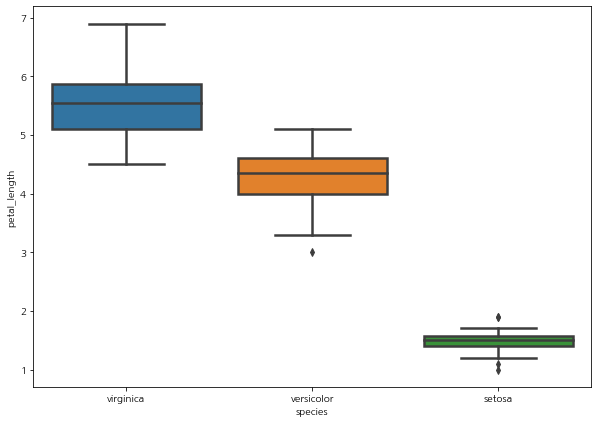

In [18]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='species',y='petal_length',data=iris,order=['virginica','versicolor','setosa'],linewidth=2.5,orient='v',dodge=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a216f5fd0>,
      dtype=object)

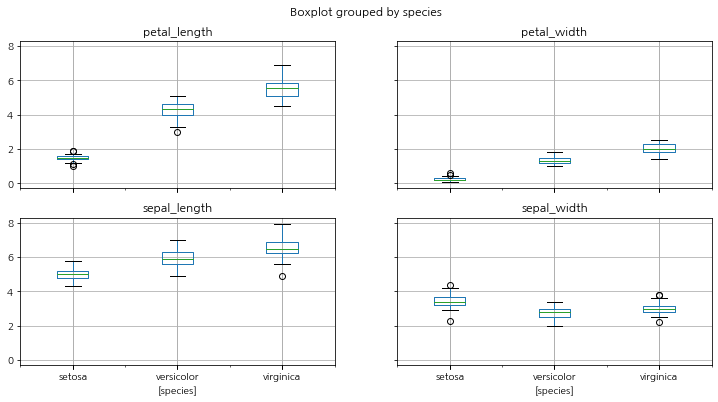

In [19]:
#iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))
iris.boxplot(by="species", figsize=(12, 6))

**7. Strip plot**

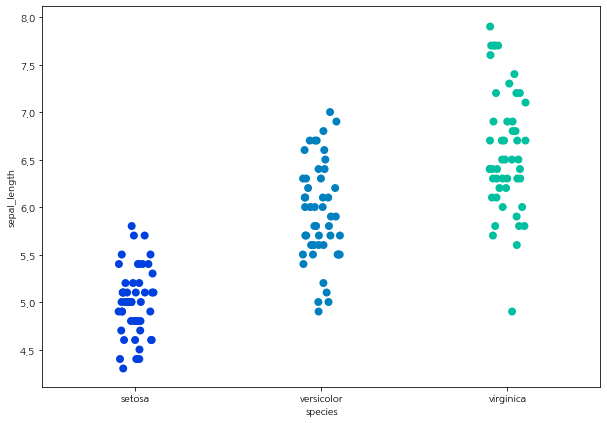

In [20]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.stripplot(x='species',y='sepal_length',data=iris,jitter=True,edgecolor='gray',size=8,palette='winter',orient='v')

**8. Combining Box and Strip Plots**

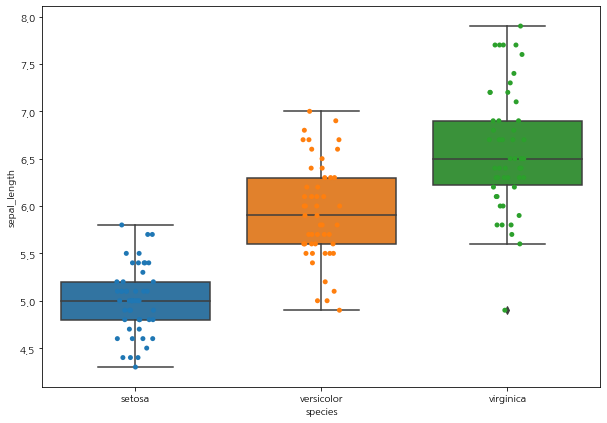

In [21]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='species',y='sepal_length',data=iris)
fig=sns.stripplot(x='species',y='sepal_length',data=iris,jitter=True,edgecolor='gray')

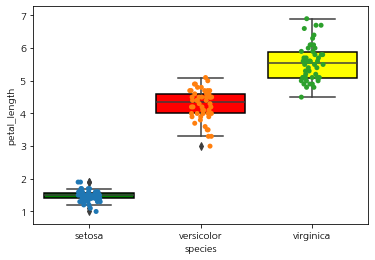

In [22]:
ax= sns.boxplot(x="species", y="petal_length", data=iris)
ax= sns.stripplot(x="species", y="petal_length", data=iris, jitter=True, edgecolor="gray")

boxtwo = ax.artists[2]
boxtwo.set_facecolor('yellow')
boxtwo.set_edgecolor('black')
boxthree=ax.artists[1]
boxthree.set_facecolor('red')
boxthree.set_edgecolor('black')
boxthree=ax.artists[0]
boxthree.set_facecolor('green')
boxthree.set_edgecolor('black')

plt.show()

**9. Violin Plot**
It is used to visualize the distribution of data and its probability distribution.This chart is a combination of a Box Plot and a Density Plot that is rotated and placed on each side, to show the distribution shape of the data. The thick black bar in the centre represents the interquartile range, the thin black line extended from it represents the 95% confidence intervals, and the white dot is the median.Box Plots are limited in their display of the data, as their visual simplicity tends to hide significant details about how values in the data are distributed

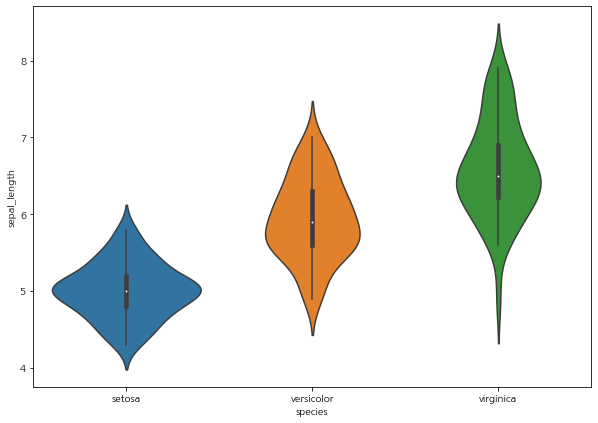

In [23]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.violinplot(x='species',y='sepal_length',data=iris)

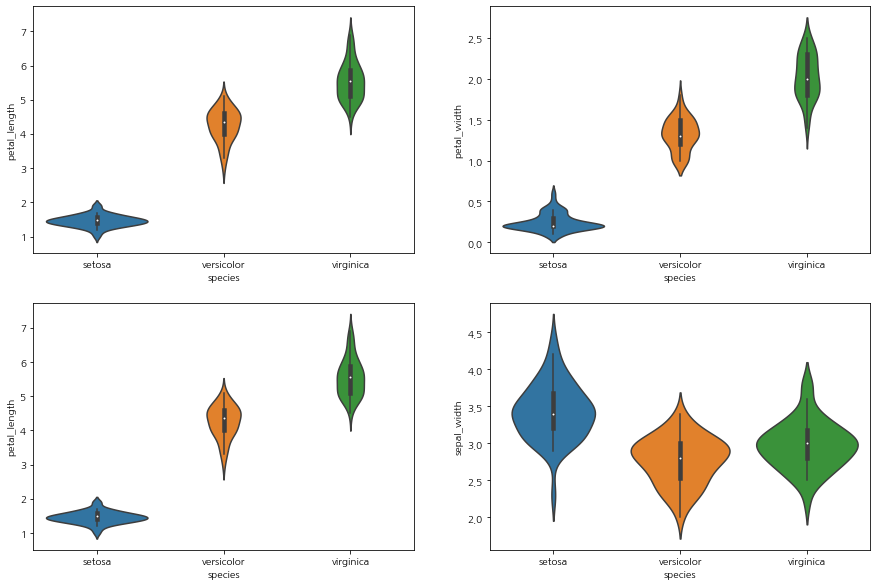

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=iris)

**10. Pair Plot:**
A “pairs plot” is also known as a scatterplot, in which one variable in the same data row is matched with another variable's value, like this: Pairs plots are just elaborations on this, showing all variables paired with all the other variables.

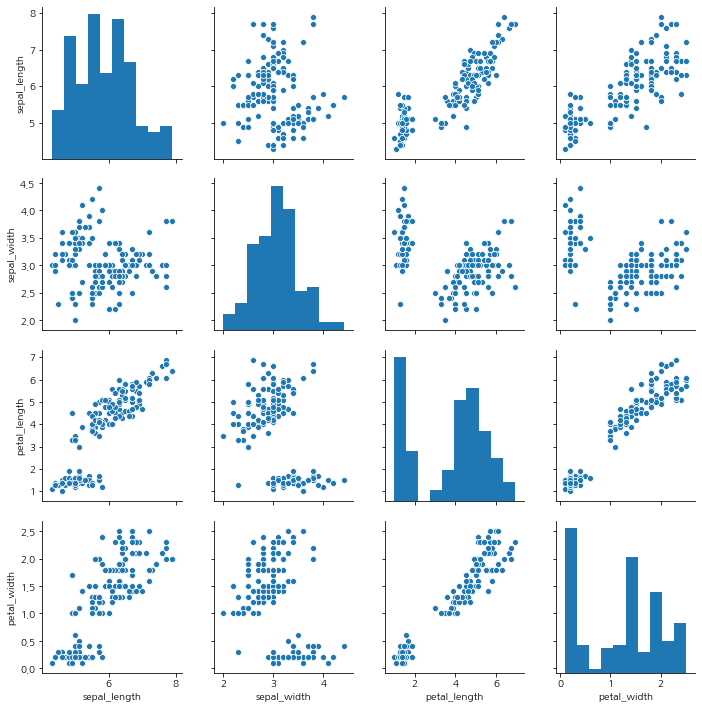

In [25]:
sns.pairplot(data=iris,kind='scatter')

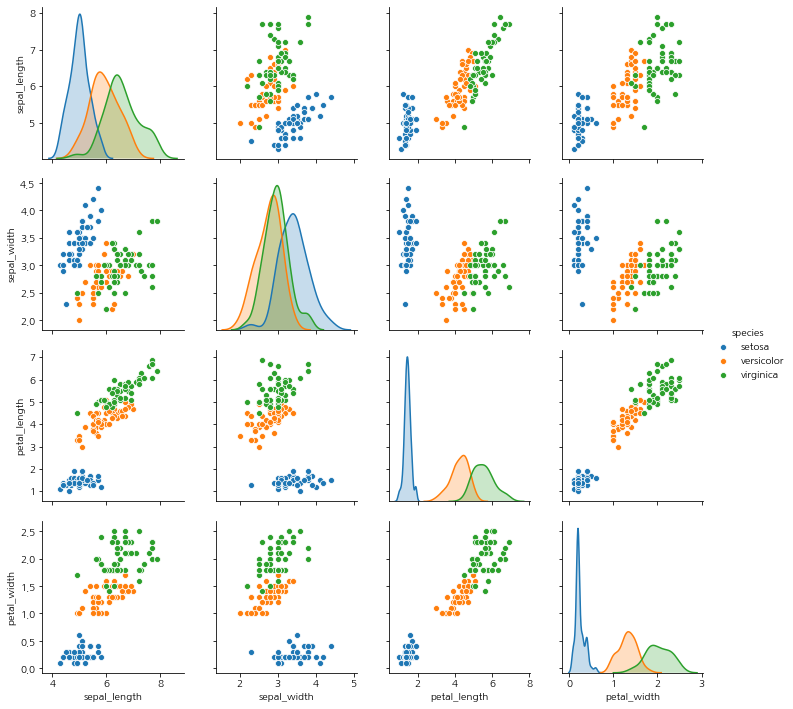

In [26]:
sns.pairplot(iris,hue='species')

**11. Heat map**
Heat map is used to find out the correlation between different features in the dataset.High positive or negative value shows that the features have high correlation.This helps us to select the parmeters for machine learning.

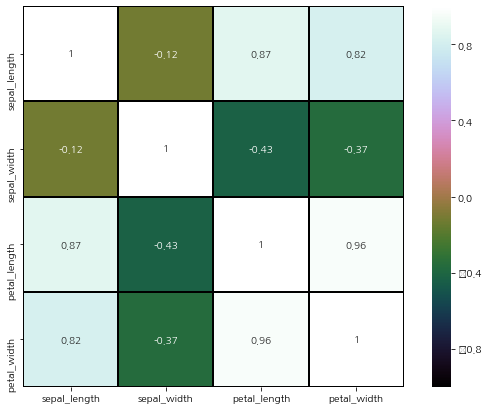

In [27]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(iris.corr(),annot=True,
                cmap='cubehelix',
                linewidths=1,
                linecolor='k',
                square=True,
                mask=False, 
                vmin=-1, 
                vmax=1,
                cbar_kws={"orientation": "vertical"},
                cbar=True)

**12. Distribution plot:**
The distribution plot is suitable for comparing range and distribution for groups of numerical data. Data is plotted as value points along an axis. You can choose to display only the value points to see the distribution of values, a bounding box to see the range of values, or a combination of both as shown here.The distribution plot is not relevant for detailed analysis of the data as it deals with a summary of the data distribution.

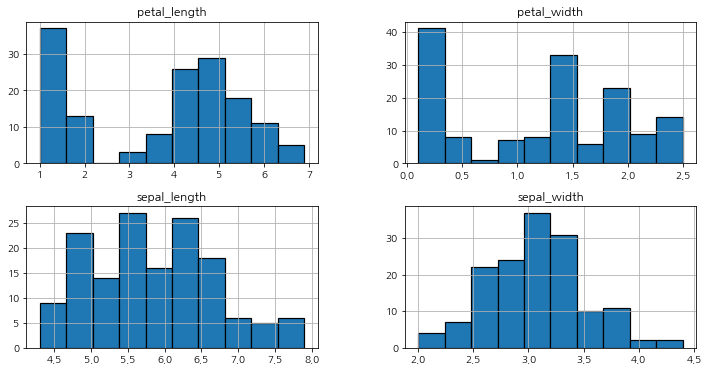

In [28]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

**13. Swarm plot**
It looks a bit like a friendly swarm of bees buzzing about their hive. More importantly, each data point is clearly visible and no data are obscured by overplotting.A beeswarm plot improves upon the random jittering approach to move data points the minimum distance away from one another to avoid overlays. The result is a plot where you can see each distinct data point, like shown in below plot




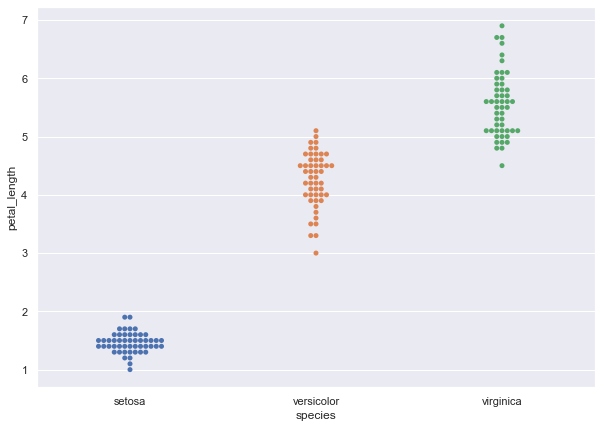

In [29]:
sns.set(style="darkgrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
fig = sns.swarmplot(x="species", y="petal_length", data=iris)

**14. Box and Swarm plot combined**

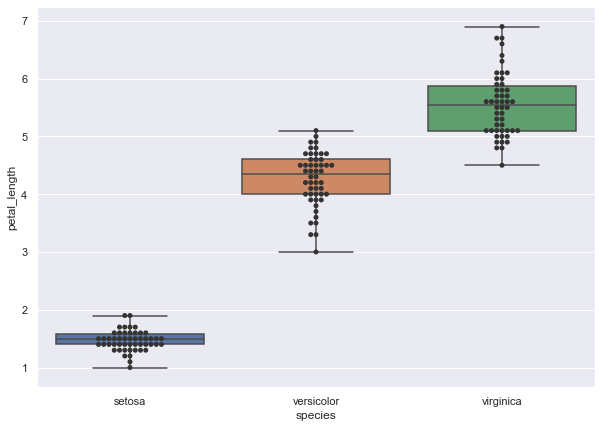

In [30]:
sns.set(style="darkgrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
fig= sns.boxplot(x="species", y="petal_length", data=iris, whis=np.inf)
fig= sns.swarmplot(x="species", y="petal_length", data=iris, color=".2")

**15. Swarm  and Violin plot combined**

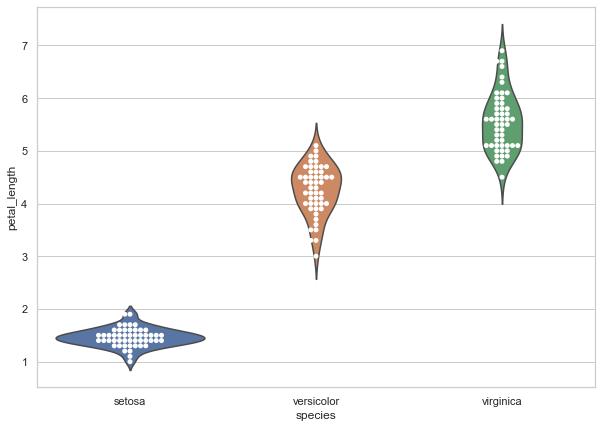

In [31]:
sns.set(style="whitegrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
ax = sns.violinplot(x="species", y="petal_length", data=iris, inner=None)
ax = sns.swarmplot(x="species", y="petal_length", data=iris,color="white", edgecolor="black")

**16. Species based classification**

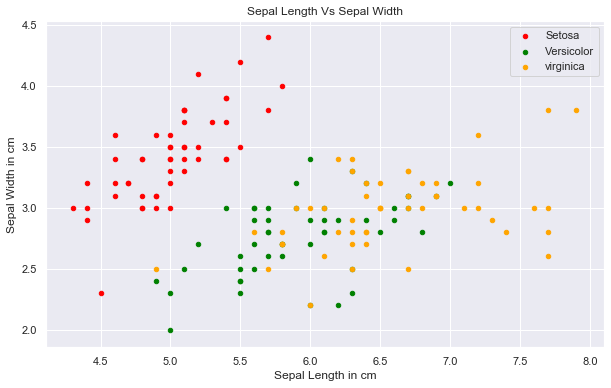

In [32]:
sns.set(style="darkgrid")
sc=iris[iris.species=='setosa'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='red',label='Setosa')
iris[iris.species=='versicolor'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='green',label='Versicolor',ax=sc)
iris[iris.species=='virginica'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='orange', label='virginica', ax=sc)
sc.set_xlabel('Sepal Length in cm')
sc.set_ylabel('Sepal Width in cm')
sc.set_title('Sepal Length Vs Sepal Width')
sc=plt.gcf()
sc.set_size_inches(10,6)

**17. LM PLot**

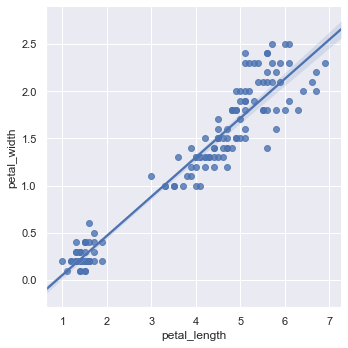

In [33]:
fig=sns.lmplot(x="petal_length", y="petal_width",data=iris)

**18. FacetGrid**

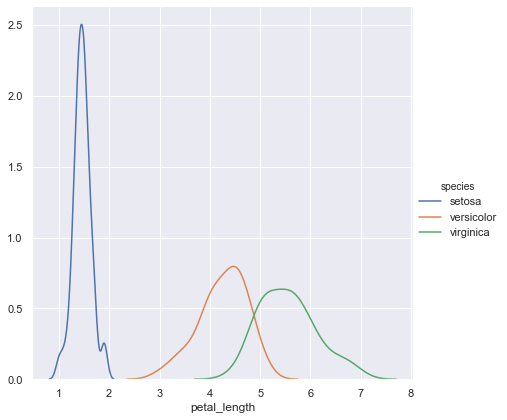

In [34]:
sns.FacetGrid(iris, hue="species", size=6) \
   .map(sns.kdeplot, "petal_length") \
   .add_legend()
plt.ioff() 

**19. Andrews Curve:**
In data visualization, an Andrews plot or Andrews curve is a way to visualize structure in high-dimensional data. It is basically a rolled-down, non-integer version of the Kent–Kiviat radar m chart, or a smoothened version of a parallel coordinate plot.In Pandas use Andrews Curves to plot and visualize data structure.Each multivariate observation is transformed into a curve and represents the coefficients of a Fourier series.This useful for detecting outliers in times series data.Use colormap to change the color of the curves

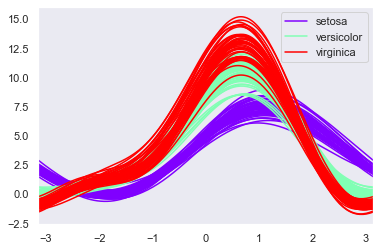

In [35]:
from pandas.plotting import andrews_curves

andrews_curves(iris,"species",colormap='rainbow')
plt.show()
plt.ioff()

**20. Parallel coordinate plot:**
This type of visualisation is used for plotting multivariate, numerical data. Parallel Coordinates Plots are ideal for comparing many variables together and seeing the relationships between them. For example, if you had to compare an array of products with the same attributes (comparing computer or cars specs across different models).

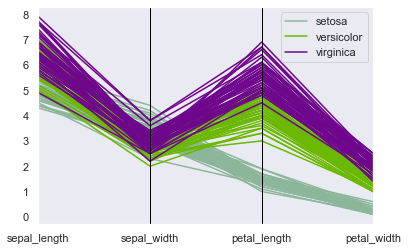

In [36]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris, "species")
plt.ioff()

**21. Radviz Plot**
RadViz Visualizer. RadViz is a multivariate data visualization algorithm that plots each feature dimension uniformly around the circumference of a circle then plots points on the interior of the circle such that the point normalizes its values on the axes from the center to each arc.

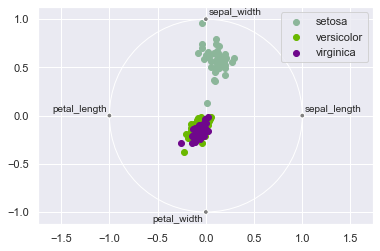

In [37]:
from pandas.plotting import radviz
radviz(iris, "species")
plt.ioff()

** 22. Factor Plot **

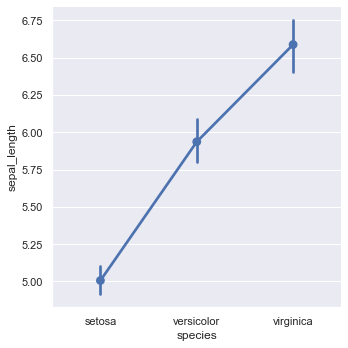

In [38]:
# f,ax=plt.subplots(1,2,figsize=(18,8))
sns.factorplot('species','sepal_length',data=iris)
plt.ioff()
plt.show()
#sns.factorplot('species','sepal_length',data=iris,ax=ax[0][0])
#sns.factorplot('Species','SepalWidthCm',data=iris,ax=ax[0][1])
#sns.factorplot('Species','PetalLengthCm',data=iris,ax=ax[1][0])
#sns.factorplot('Species','PetalWidthCm',data=iris,ax=ax[1][1])

** 23. Boxen Plot**|

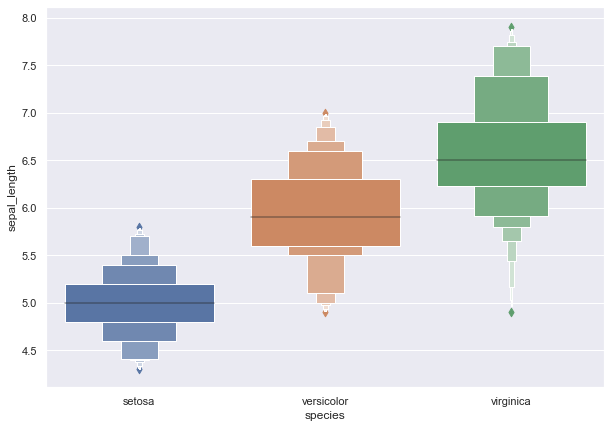

In [39]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxenplot(x='species',y='sepal_length',data=iris)

**24.Residual Plot :**
The most useful way to plot the residuals, though, is with your predicted values on the x-axis, and your residuals on the y-axis. The distance from the line at 0 is how bad the prediction was for that value.

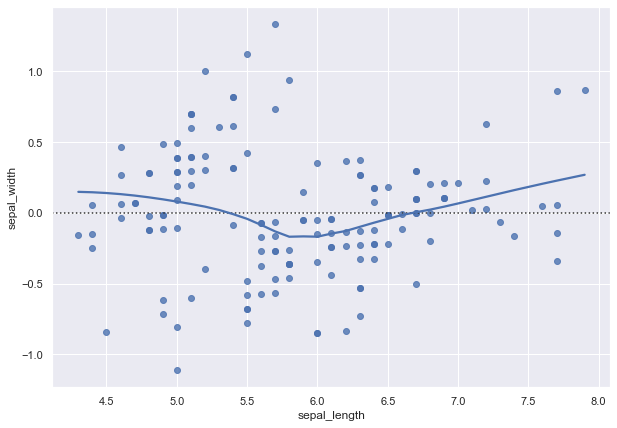

In [40]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.residplot('sepal_length', 'sepal_width',data=iris,lowess=True)

**25.Venn Diagram :**
A Venn diagram (also called primary diagram, set diagram or logic diagram) is a diagram that shows all possible logical relations between a finite collection of different sets. Each set is represented by a circle. The circle size represents the importance of the group. The groups are usually overlapping: the size of the overlap represents the intersection between both groups.

In [41]:
!pip install matplotlib-venn

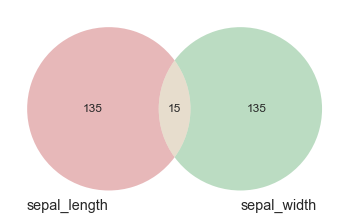

In [42]:
# venn2
from matplotlib_venn import venn2

sepal_length = iris.iloc[:,0]
sepal_width = iris.iloc[:,1]
petal_length = iris.iloc[:,2]
petal_width = iris.iloc[:,3]
# First way to call the 2 group Venn diagram
venn2(subsets = (len(sepal_length)-15, len(sepal_width)-15, 15), set_labels = ('sepal_length', 'sepal_width'))
plt.show()

**26. Spider Graph **

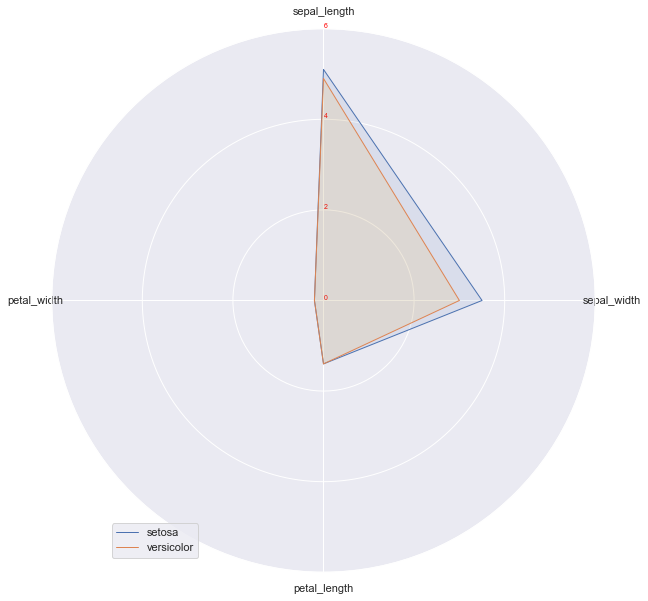

In [43]:
from math import pi

categories = list(iris)[:4]
N = len(categories)
angles = [ n / float(N)*2*pi for n in range(N)]
angles = angles + angles[:1]
plt.figure(figsize = (10,10))
ax = plt.subplot(111,polar = True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1],categories)
ax.set_rlabel_position(0)
plt.yticks([0,2,4,6],["0","2","4","6"],color= "red", size = 7)
plt.ylim(0,6)

values = iris.loc[0].drop("species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="setosa" )
ax.fill(angles,values,"b",alpha=0.1)

values = iris.loc[1].drop("species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="versicolor" )
ax.fill(angles,values,"orange",alpha=0.1)
plt.legend(loc = "upper left",bbox_to_anchor = (0.1,0.1))
plt.show()

**27.Donut plot **

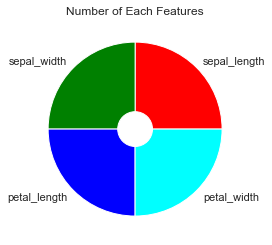

In [44]:
# donut plot
feature_names = "sepal_length","sepal_width","petal_length","petal_width"
feature_size = [len(sepal_length),len(sepal_width),len(petal_length),len(petal_width)]
# create a circle for the center of plot
circle = plt.Circle((0,0),0.2,color = "white")
plt.pie(feature_size, labels = feature_names, colors = ["red","green","blue","cyan"] )
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Number of Each Features")
plt.show()

**28.KDE Plot **

Text(0, 0.5, 'Sepal Width Cm')

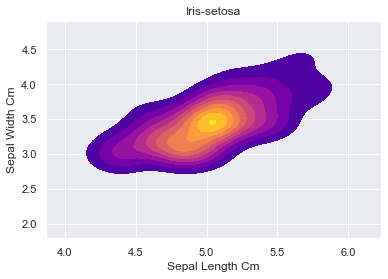

In [45]:
# Create a kde plot of sepal_length versus sepal width for setosa species of flower.
sub=iris[iris['species']=='setosa']
sns.kdeplot(data=sub[['sepal_length','sepal_width']],cmap="plasma", shade=True, shade_lowest=False)
plt.title('Iris-setosa')
plt.xlabel('Sepal Length Cm')
plt.ylabel('Sepal Width Cm')

#### 29.Cluster Map

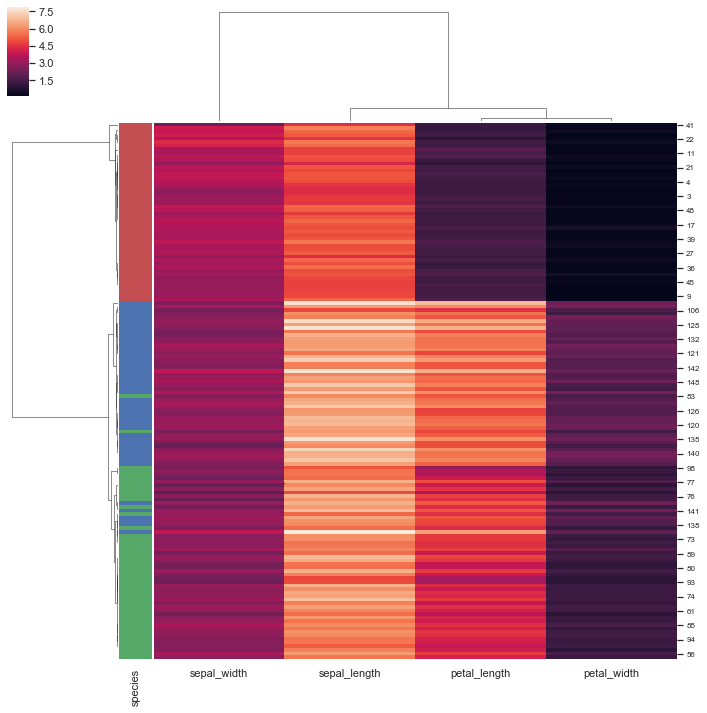

In [46]:
# cluster map (dendogram and tree)
df = iris.loc[:,["sepal_length","sepal_width","petal_length","petal_width"]]
df1 = iris.species
x = dict(zip(df1.unique(),"rgb"))
row_colors = df1.map(x)
cg = sns.clustermap(df,row_colors=row_colors,figsize=(12, 12),metric="correlation")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0,size =8)
plt.show()

**30.Dashboard**

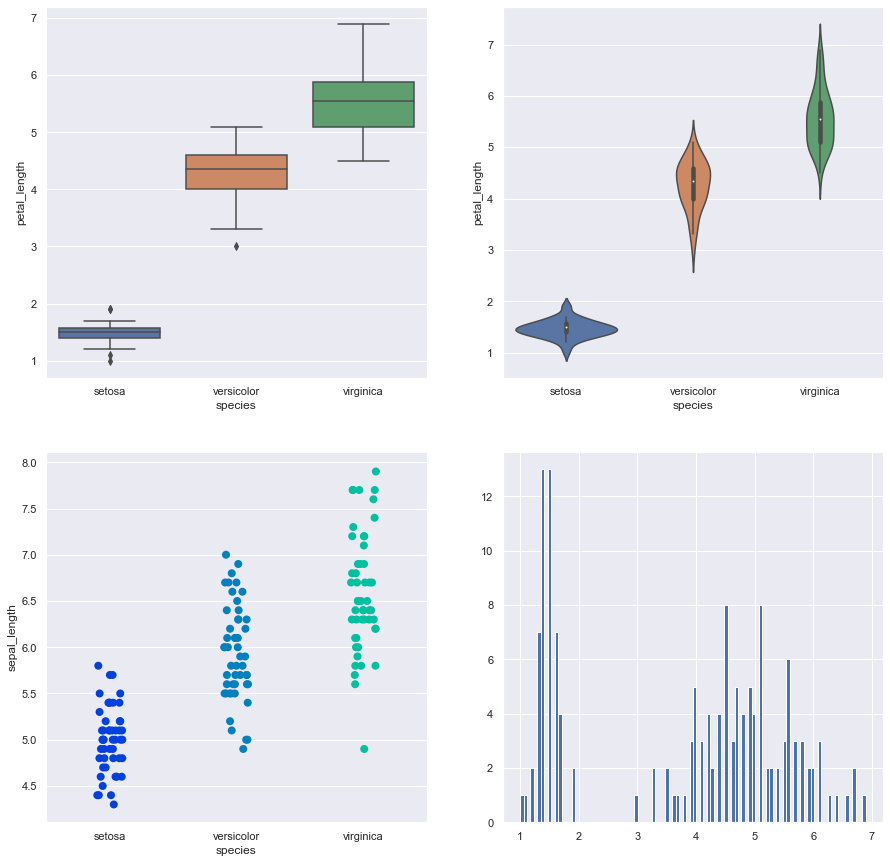

In [47]:
sns.set_style('darkgrid')
f,axes=plt.subplots(2,2,figsize=(15,15))

k1=sns.boxplot(x="species", y="petal_length", data=iris,ax=axes[0,0])
k2=sns.violinplot(x='species',y='petal_length',data=iris,ax=axes[0,1])
k3=sns.stripplot(x='species',y='sepal_length',data=iris,jitter=True,edgecolor='gray',size=8,palette='winter',orient='v',ax=axes[1,0])
#axes[1,1].hist(iris.hist,bin=10)
axes[1,1].hist(iris.petal_length,bins=100)
#k2.set(xlim=(-1,0.8))
plt.show()

In the dashboard we have shown how to create multiple plots to foam a dashboard using Python.In this plot we have demonstrated how to plot Seaborn and Matplotlib plots on the same Dashboard.

**31.Stacked Histogram**

In [48]:
iris['species'] = iris['species'].astype('category')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


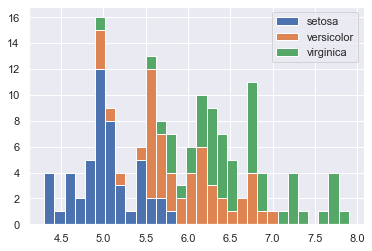

In [49]:
list1=list()
mylabels=list()
for gen in iris.species.cat.categories:
    list1.append(iris[iris.species==gen].sepal_length)
    mylabels.append(gen)
    
h=plt.hist(list1,bins=30,stacked=True,rwidth=1,label=mylabels)
plt.legend()
plt.show()

With Stacked Histogram we can see the distribution of Sepal Length of Different Species together.This shows us the range of Sepan Length for the three different Species of Iris Flower.

**32.Area Plot:**
Area Plot gives us a visual representation of Various dimensions of Iris flower and their range in dataset.

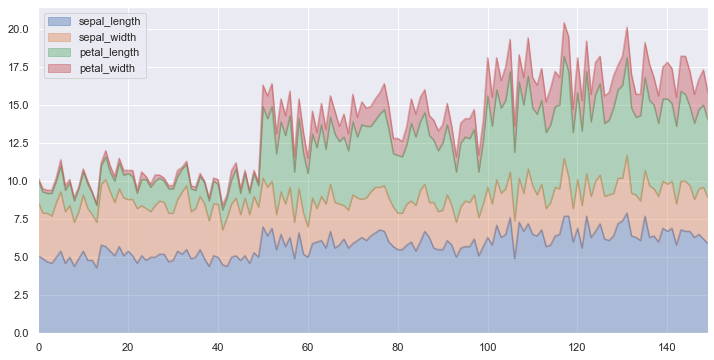

In [50]:
#iris['SepalLengthCm'] = iris['SepalLengthCm'].astype('category')
#iris.head()
#iris.plot.area(y='SepalLengthCm',alpha=0.4,figsize=(12, 6));
iris.plot.area(y=['sepal_length','sepal_width','petal_length','petal_width'],alpha=0.4,figsize=(12, 6));

**33.Distplot:**
It helps us to look at the distribution of a single variable.Kde shows the density of the distribution


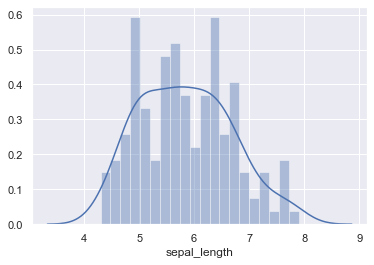

In [51]:
sns.distplot(iris['sepal_length'],kde=True,bins=20);